# Calculation and Visualization of "k" Ratios for Different Dimensions, Instances, and L Values

This notebook contains the calculation of all the "k" ratios for all dimensions, all values of L, and all instances. 
These ratios are collected in two dictionaries: `d_n_instance` and `d_n_L`. Both dictionaries store the same information but have different structures.

Additionally, the notebook includes two plots that help visualize the content of these dictionaries. It also contains two functions that are used to round the values of `k`.

In [2]:
import math
from typing import Any, List, Dict, Tuple

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Rectangle
from matplotlib.ticker import MultipleLocator
import numpy as np
from pprint import pprint # to print dictionaries

from utils_to_study_an_instance import find_spectrum, define_instance

In [3]:
def round_up(n: float, decimals: int = 0) -> float:
    """
    Round a number `n` up to a specified number of decimal places.

    Parameters:
        n (float): The number to round up.
        decimals (int): The number of decimal places to round to (default is 0).

    Returns:
        float: The rounded-up value of `n` to the specified decimal places.
    
    Example:
        round_up(3.14159, 2) -> 3.15
    """
    multiplier = 10 ** decimals  # Shift the decimal point
    return math.ceil(n * multiplier) / multiplier  # Round up and shift back


def round_up_nested_d(d_in: Dict[Any, Dict[Any, List[float]]]) -> Dict[Any, Dict[Any, List[float]]]:
    """
    Apply the `round_up` function to each value in a nested dictionary structure 
    where the values are dictionaries of lists of floats.

    Parameters:
        d_in (Dict[Any, Dict[Any, List[float]]]): 
            A dictionary where each key maps to another dictionary, 
            which maps to a list of float values.

    Returns:
        Dict[Any, Dict[Any, List[float]]]: 
            A new nested dictionary where the lists are 
            rounded-up to the specified decimal places.
    """
    # Apply round_up for each value in the list

    return {outer_key: {inner_key: [round_up(v, 3) for v in value_list]  
                         for inner_key, value_list in inner_dict.items()}
             for outer_key, inner_dict in d_in.items()}

### Creating a Nested Dictionary  `d_n_instance` to Store `k` Values for Each `n` and `instance`

Create a dictionary where:

- For each dimension `n`, there is a sub-dictionary with:
  - **Keys**: Instance numbers.
  - **Values**: Lists of length 3 containing the `k` values for 3 different lengths `L`:
    1. `L = n` (the dimension).
    2. `L = length of the largest exact cover (EC)`.
    3. `L = length of the minimum exact cover (MEC)`.


In [4]:
def compute_d_n_instance(dimensions: List[int], num_instances: int) -> Dict[int, Dict[int, List[float]]]:
    """
    Compute a nested dictionary `d_n_instance` where for each dimension `n` 
    and each instance, three `k` are calculated based on different `L` values.

    Parameters:
        dimensions (List[int]): List of dimensions `n` to evaluate.
        num_instances (int): Number of instances for each dimension.

    Returns:
        Dict[int, Dict[int, List[float]]]: A nested dictionary with the structure:
            {
                n: {
                    instance: [k1, k2, k3]  # Three `k` ratios for the instance
                }
            }
    """    
    d_n_instance = {} # of the form Dict[n, Dict[instance, [ks_for_fixed_instance]]]

    for n in dimensions:
        # Initialize a dictionary for the current dimension
        d_n_instance[n] = {}

        # Iterate over each instance for the current dimension
        for instance in range(1, num_instances + 1):
            ks_for_fixed_instance: List[float] = []

            # Generate the instance and its subsets
            U, subsets_dict = define_instance(n, instance, verbose=False)
            
            # Compute the lengths of all subsets
            lengths = [len(s) for s in list(subsets_dict.values())]

            # Find the feasible states and exact covers for the instance
            EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)[4]
            
            # Compute the lengths of the exact covers
            L_EC: List[int] = [ec.count("1") for ec in EXACT_COVERS]

            # Compute three `k` ratios for the current instance
            for L in [n, max(L_EC), min(L_EC)]:
                k = (L / min(lengths)) / n
                ks_for_fixed_instance.append(k)

            # Store the list of `k` ratios for the current instance
            d_n_instance[n][instance] = ks_for_fixed_instance  

    return d_n_instance

In [5]:
# Build the nested dictionary
d_n_instance = compute_d_n_instance(dimensions=[6,8,10], num_instances=10)

# # Print
# pprint(d_n_instance)

# Round up and print
pprint(round_up_nested_d(d_n_instance))

{6: {1: [0.334, 0.167, 0.167],
     2: [0.5, 0.167, 0.167],
     3: [0.5, 0.25, 0.167],
     4: [0.334, 0.167, 0.112],
     5: [0.5, 0.334, 0.167],
     6: [0.5, 0.25, 0.167],
     7: [0.5, 0.25, 0.25],
     8: [0.334, 0.167, 0.167],
     9: [0.25, 0.084, 0.084],
     10: [0.25, 0.084, 0.084]},
 8: {1: [0.25, 0.063, 0.063],
     2: [0.334, 0.125, 0.084],
     3: [0.2, 0.075, 0.05],
     4: [0.25, 0.125, 0.063],
     5: [0.167, 0.042, 0.042],
     6: [0.25, 0.094, 0.094],
     7: [0.25, 0.063, 0.063],
     8: [0.334, 0.125, 0.084],
     9: [0.334, 0.167, 0.084],
     10: [0.25, 0.094, 0.094]},
 10: {1: [0.2, 0.06, 0.04],
      2: [0.2, 0.06, 0.04],
      3: [0.2, 0.08, 0.06],
      4: [0.167, 0.05, 0.034],
      5: [0.2, 0.06, 0.04],
      6: [0.2, 0.06, 0.04],
      7: [0.167, 0.05, 0.034],
      8: [0.167, 0.05, 0.034],
      9: [0.167, 0.05, 0.034],
      10: [0.167, 0.05, 0.034]}}


### Reversing `d_n_instance` to Create a  Nested Dictionary  `d_n_L` to Store `k` Values for Each `n` and `L`

The objective is to create a structured dictionary where:

1. For each dimension `n`, 
2. We store **three sub-dictionaries** corresponding to three different types of `L`:
   - `L = n`
   - `L = length of the largest EC`
   - `L = length of the MEC`
3. Each of these sub-dictionaries contains **a list of 10 `k`-values**, where each value corresponds to an instance.

In [54]:
# Build the nested dictionary
d_n_L = {}
for n in [6,8,10]:
    d_n_L[n] = {"L=n": [k_list[0] for k_list in d_n_instance[n].values()], 
                "L=max(L_EC)": [k_list[1] for k_list in d_n_instance[n].values()],
                "L=L_MEC": [k_list[2] for k_list in d_n_instance[n].values()]}
# # Print
# pprint(d_n_L)

# Round up and print
pprint(round_up_nested_d(d_n_L))

{6: {'L=L_MEC': [0.167,
                 0.167,
                 0.167,
                 0.112,
                 0.167,
                 0.167,
                 0.25,
                 0.167,
                 0.084,
                 0.084],
     'L=max(L_EC)': [0.167,
                     0.167,
                     0.25,
                     0.167,
                     0.334,
                     0.25,
                     0.25,
                     0.167,
                     0.084,
                     0.084],
     'L=n': [0.334, 0.5, 0.5, 0.334, 0.5, 0.5, 0.5, 0.334, 0.25, 0.25]},
 8: {'L=L_MEC': [0.063,
                 0.084,
                 0.05,
                 0.063,
                 0.042,
                 0.094,
                 0.063,
                 0.084,
                 0.084,
                 0.094],
     'L=max(L_EC)': [0.063,
                     0.125,
                     0.075,
                     0.125,
                     0.042,
                     0.094,
 

### Analysis of `k` vs `L` for Each Dimension `n`

After creating the dictionary `d_n_L`, this section focuses on visualizing its contents. The goal is to analyze how the values of `k` vary with respect to `L` for each dimension `n`. We will generate two different types of plots for this analysis.

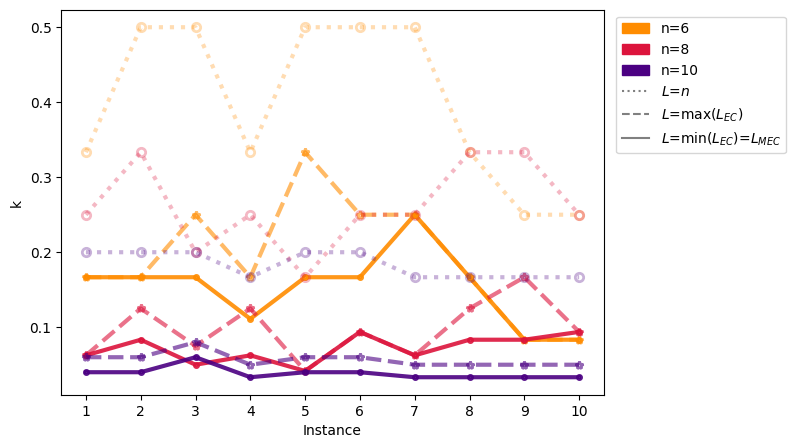

In [70]:
plt.figure(figsize=(7,5))
x = np.arange(1, 11)
plt.ylabel("k")
plt.xlabel("Instance")

colors = ["darkorange", "crimson", "indigo"]
markers = ["o", "*", "."]
alphas = [0.3, 0.6, 0.9]
linestyles = ['dotted', 'dashed', 'solid']

labels = ['$L$=$n$','$L$=max($L_{EC}$)','$L$=min($L_{EC}$)=$L_{MEC}$']

# Initialize lists for storing legend handles (lines and patches)
lines = []
patches = []

# Loop over the dimensions (6, 8, and 10)
for j, n in enumerate([6, 8, 10]): 
    # Loop over each L type (L=n, L=max(EC), L=min(EC)=MEC)
    for i, L in enumerate(d_n_L[n].keys()): 
        plt.plot(x, d_n_L[n][L], 
                 color=colors[j], linestyle=linestyles[i], 
                 linewidth=3, alpha=alphas[i],
                 marker=markers[i], markerfacecolor="None", 
                 markeredgecolor=colors[j], markeredgewidth=2)
    
    # Add line legend (for dimension n)
    lines.append(Line2D([], [], color='grey', linestyle=linestyles[j],
                 markersize=15, label=labels[j]))
    
    # Add color patch legend (for dimension n)
    patches.append(Patch(color=colors[j], label=f"n={n}"))
    
# Combine the legend for both lines and color patches, and position it outside the plot
plt.legend(handles=patches+lines,
           bbox_to_anchor=(1.01, 1.0), loc='upper left')

# Set x-axis ticks to natural numbers (1 to 10)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.show()

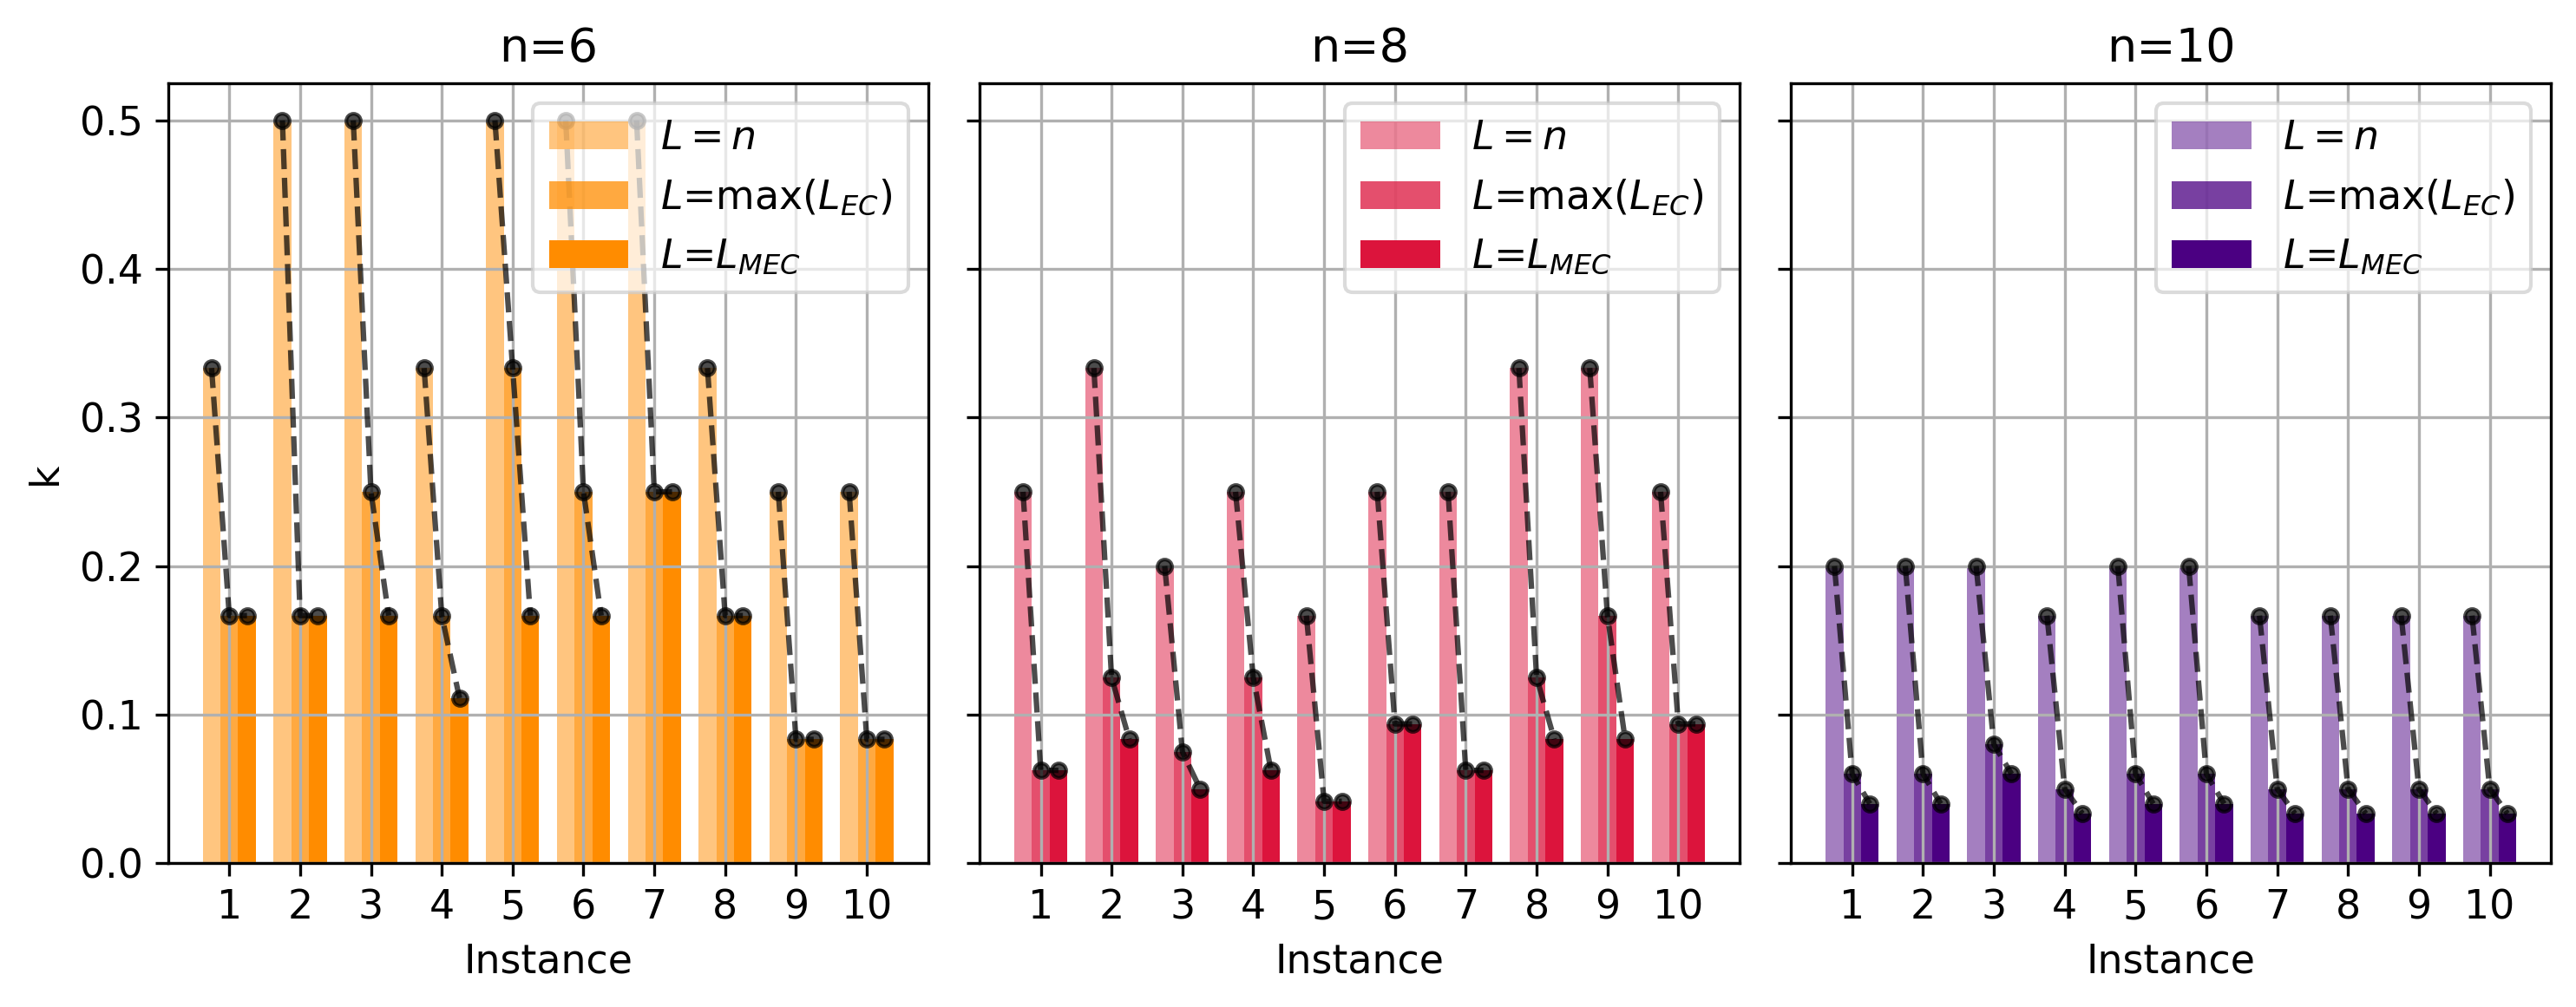

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=300, sharey=True)

labels = ["$L=n$", "$L$=max($L_{EC}$)", "$L$=$L_{MEC}$"]
colors = ["darkorange", "crimson", "indigo"]
ns = [6, 8, 10]
x = np.arange(1, 11)

width = 0.25 # bar width 
fontsize = 11 

# Generate histograms for each dimension (n=6, 8, 10)
for ax, n, color in zip(axes, ns, colors):
    bar_positions = []
    # Generate bars for each type of L (L=n, L=max(L_EC), L=L_MEC)
    for i, (key, offset) in enumerate(zip(["L=n", "L=max(L_EC)", "L=L_MEC"], [-width, 0, width])):
        bars = ax.bar(
            x + offset, d_n_L[n][key], width=width, color=color, alpha=0.5 + 0.25 * i,
            label=labels[i]
        )
        bar_positions.append(x + offset)
        # Optional: Add points above the bars (currently commented out)
        # ax.plot(x + offset, d[n][key], color='black', marker='.', linestyle='--', label="_nolegend_")  # Line above bars
    
    # Add a line for each x-tick to show the data points
    for i in range(10):  # Iterate over 10 x-ticks (instances)
        y_values = [d_n_L[n][key][i] for key in ["L=n", "L=max(L_EC)", "L=L_MEC"]]
        ax.plot([x[i]-width, x[i], x[i]+width], y_values, 
                color='k', linestyle='--', marker='.', markersize=8, alpha=0.7)

    # Set the title and labels for each subplot
    ax.set_title(f"n={n}", fontsize=fontsize + 2)
    ax.set_xlabel("Instance", fontsize=fontsize)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1)) 
    ax.tick_params(axis='both', which='major', labelsize=fontsize)  
    ax.legend(fontsize=fontsize, framealpha=0.7) 
    ax.grid()  # Show grid
    if ax == axes[0]:
        ax.set_ylabel("k", fontsize=fontsize)

plt.tight_layout()
plt.subplots_adjust(top=0.9) 
# plt.savefig("k.pdf", bbox_inches="tight") 
plt.show()